Importing dependencies

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import xgboost as xgb


Loading the test data

In [3]:
x_test = pd.read_csv('../data/processed/x_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()
y_test.describe()

count      4087.000000
mean     207744.357720
std      116955.237695
min       14999.000000
25%      120200.000000
50%      178300.000000
75%      269100.000000
max      500001.000000
Name: median_house_value, dtype: float64

Loading the tuned model

In [4]:
model = joblib.load('../models/xgb_best_model.pkl')

Testing the model

In [5]:
y_pred = model.predict(x_test)

Calculating model accuracy

In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print('Final RMSE: ', rmse)
print('Final MAE: ', mae)

Final RMSE:  44729.19404594722
Final MAE:  29090.654296875


Plotting the Predicted vs Actual home prices

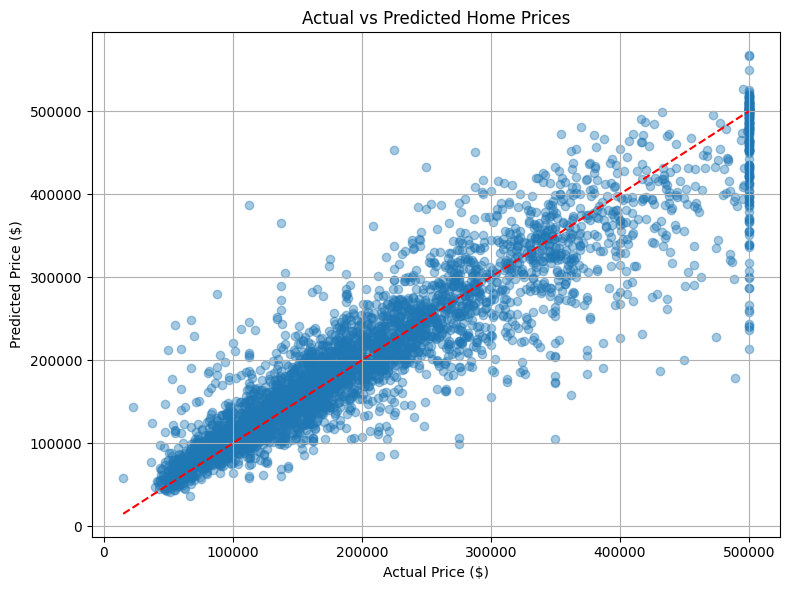

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Home Prices')
plt.grid(True)
plt.tight_layout()
#Saving the figure
plt.savefig('../visuals/actual_vs_predicted_prices.png')



Making Residual Plot

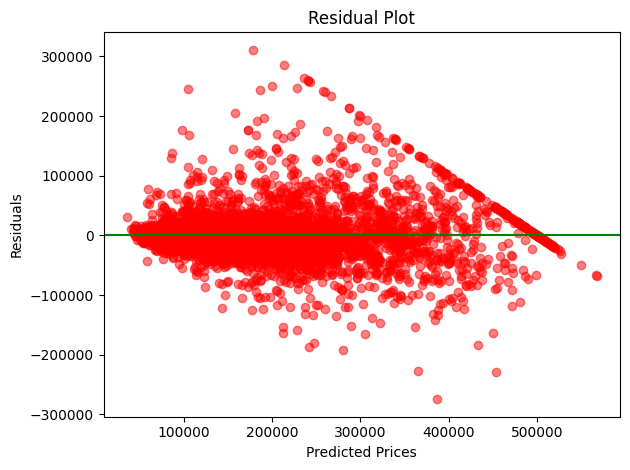

In [18]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5, c='red')
plt.axhline(0, color='green', linestyle='-')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('../visuals/residual_plot.png')
plt.show()

Distribution of predicted errors 

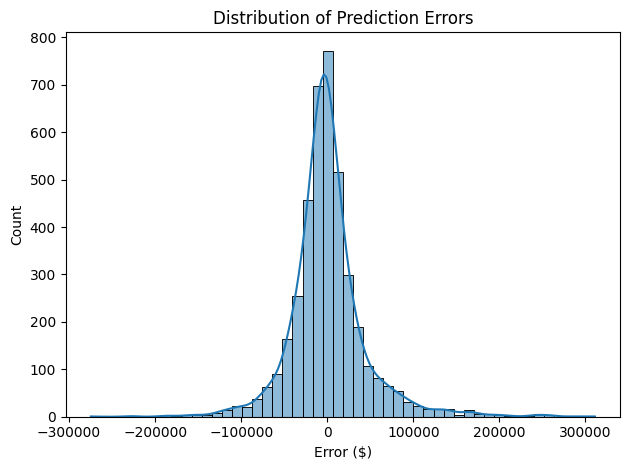

In [17]:
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error ($)')
plt.tight_layout()
plt.savefig('../visuals/error_distribution.png')
plt.show()

Plotting Feature Importances

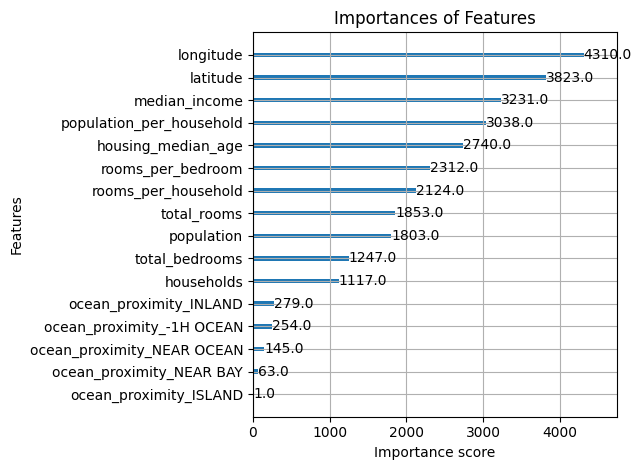

In [16]:
xgb.plot_importance(model, max_num_features=18)
plt.title('Importances of Features')
plt.tight_layout()
plt.savefig('../visuals/feature_importances.png')
plt.show()